In [ ]:
# duz_ysa_mnist.ipynb
# flat, Dense katmanlı ysa da denir.
# bu ysa modeli vektör(1D) girişleri alabilir.

In [ ]:
from keras.datasets import mnist

(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
kayit=59988
plt.imshow(train_images[kayit],cmap="gray")
plt.show()
print(train_labels[kayit])

In [ ]:
np.set_printoptions(linewidth=300)

print(train_images[kayit])

In [ ]:
# bu kod bloğu bir kere çalıştırılmalı


train_images=train_images.astype("float32")/255
test_images=test_images.astype("float32")/255
# np.set_printoptions(linewidth=300)

# print(train_images[kayit])



In [ ]:
from keras.utils import to_categorical

print(train_labels[0:3])
print(test_labels[0:3])

train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)
print("******")
print(train_labels[0:3])
print()
print(test_labels[0:3])

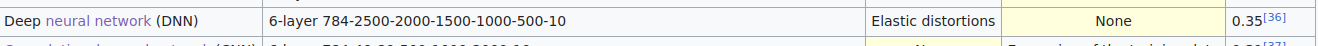

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten,Dense
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(2500,activation="relu"))# relu,softmax,sigmoid,tanh....
model.add(Dense(2000,activation="relu"))
model.add(Dense(1500,activation="relu"))
model.add(Dense(1000,activation="relu"))
model.add(Dense(500,activation="relu"))
model.add(Dense(10,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

cp=ModelCheckpoint("mnist_duz.h5",monitor="accuracy",mode="max",save_best_only=True)

model.summary()

In [ ]:
history=model.fit(train_images,train_labels,epochs=5,validation_split=0.2,callbacks=[cp])

In [ ]:
sinav=model.evaluate(test_images,test_labels)
print(f"loss:{sinav[0]}--accuracy:{sinav[1]}")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["train","validation"],loc="upper right")
plt.show()

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["train","validation"],loc="upper left")
plt.show()

In [ ]:
secilen=78
plt.imshow(test_images[secilen],cmap="gray")
plt.show()
print(test_labels[secilen])
#tahmin kısmı
tahmin=model.predict(test_images[secilen].reshape(1,28,28))
print("tahmin edilen rakam:", np.argmax(tahmin))
for i in range(10):
    print(f"{i} olma ihtimali tahmin:{tahmin[0,i]}")

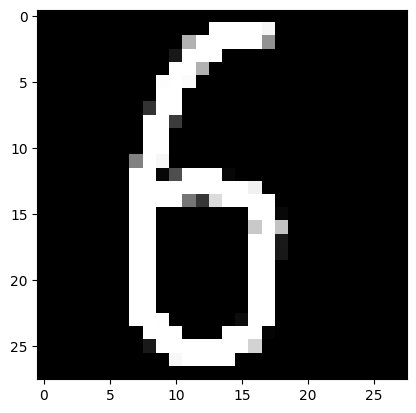

1/1 [==============================] - 0s 40ms/step
8
[[ 24  24  24  24  24  24  24  24  24  24  24  24  24  24  24  24  24  24
   24  24  24  24  24  24  24  24  24  24]
 [ 24  24  24  24  24  24  24  24  24  24  24  24  24 255 255 255 255 246
   24  24  24  24  24  24  24  24  24  24]
 [ 24  24  24  24  24  24  24  24  24  24  24 185 255 255 255 255 255 156
   24  24  24  24  24  24  24  24  24  24]
 [ 24  24  24  24  24  24  24  24  24  24  46 255 255 255  24  24  24  24
   24  24  24  24  24  24  24  24  24  24]
 [ 24  24  24  24  24  24  24  24  24  24 255 255 184  24  24  24  24  24
   24  24  24  24  24  24  24  24  24  24]
 [ 24  24  24  24  24  24  24  24  24 253 255 251  24  24  24  24  24  24
   24  24  24  24  24  24  24  24  24  24]
 [ 24  24  24  24  24  24  24  24  24 255 255  24  24  24  24  24  24  24
   24  24  24  24  24  24  24  24  24  24]
 [ 24  24  24  24  24  24  24  24  70 255 255  24  24  24  24  24  24  24
   24  24  24  24  24  24  24  24  24  24]
 [ 24  24 

In [7]:
import cv2
import keras
import matplotlib.pyplot as plt
import numpy as np

model=keras.models.load_model("/home/serkan/Belgeler/bilsem23_24/O2H1_2324/ML/mnist_duz.h5")

img = cv2.imread("/home/serkan/Belgeler/bilsem23_24/O2H1_2324/ML/rakam6.png",cv2.IMREAD_GRAYSCALE)
# img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img=cv2.resize(img,(28,28),interpolation=cv2.INTER_LINEAR)
# 
# img[img<25]=0
plt.imshow(img,cmap="gray")
plt.show()
tahmin2=model.predict(img.reshape(1,28,28))
print(np.argmax(tahmin2))
print(img)
# for i in range(10):
#     print(f"{i} olma ihtimali tahmin:{tahmin2[0,i]}")

In [3]:
tahmin2=model.predict(img.reshape(1,28,28))
print(np.argmax(tahmin2))

1/1 [==============================] - 0s 14ms/step
3
